In [1]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization


from sklearn.model_selection import train_test_split # data split


from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn import ensemble


from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size



In [2]:
#IMPORTING DATA

df = pd.read_csv("data/Prix de l'immobilier à Montpellier en 2018 (avec les données de la métropole).csv",sep=';')

In [3]:

#VALEUR MANQUANTE


df.dropna(inplace = True)

#print(cl(df.isnull().sum(), attrs = ['bold']))



In [4]:
#Statistique descriptive
#df.describe()

## Data Visualisation

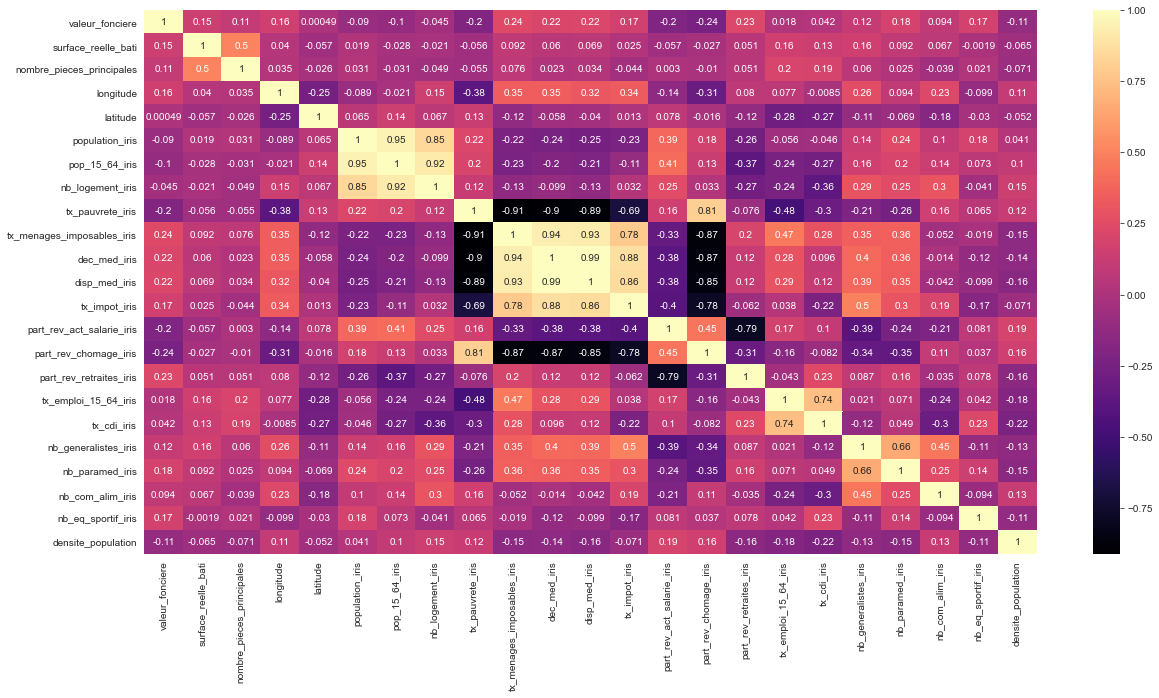

In [5]:
#Heatmap ou carte thermique
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

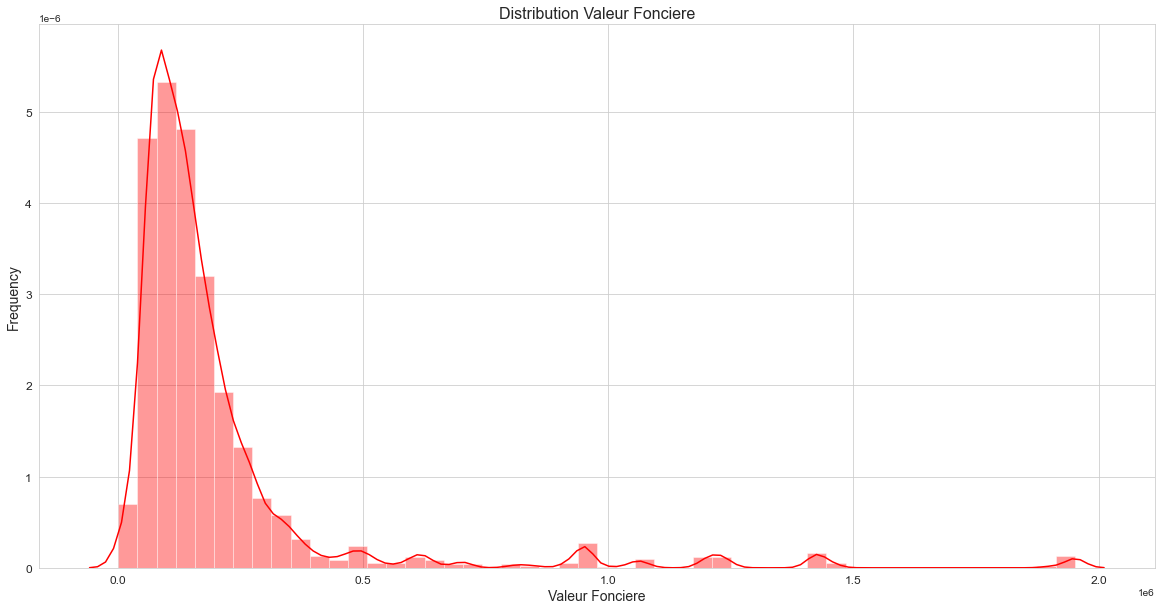

In [6]:
sb.distplot(df['valeur_fonciere'], color = 'r')
plt.title('Distribution Valeur Fonciere', fontsize = 16)
plt.xlabel('Valeur Fonciere', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [7]:
#Verification des types de variable

print(cl(df.dtypes, attrs = ['bold']))

valeur_fonciere               float64
surface_reelle_bati           float64
nombre_pieces_principales     float64
longitude                     float64
latitude                      float64
population_iris               float64
pop_15_64_iris                float64
nb_logement_iris              float64
tx_pauvrete_iris              float64
tx_menages_imposables_iris    float64
dec_med_iris                  float64
disp_med_iris                 float64
tx_impot_iris                 float64
part_rev_act_salarie_iris     float64
part_rev_chomage_iris         float64
part_rev_retraites_iris       float64
tx_emploi_15_64_iris          float64
tx_cdi_iris                   float64
nb_generalistes_iris          float64
nb_paramed_iris               float64
nb_com_alim_iris              float64
nb_eq_sportif_iris            float64
densite_population            float64
dtype: object


In [8]:
# Conversion des float en int
df = df.apply( pd.to_numeric, errors='coerce' ).astype('int64')
#print(cl(df.dtypes, attrs = ['bold']))

In [9]:
X = df[['surface_reelle_bati','nombre_pieces_principales','longitude', 'latitude', 'population_iris', 'pop_15_64_iris',
       'nb_logement_iris', 'tx_pauvrete_iris', 'tx_menages_imposables_iris',
       'dec_med_iris', 'disp_med_iris', 'tx_impot_iris',
       'part_rev_act_salarie_iris', 'part_rev_chomage_iris',
       'part_rev_retraites_iris', 'tx_emploi_15_64_iris', 'tx_cdi_iris',
       'nb_generalistes_iris', 'nb_paramed_iris', 'nb_com_alim_iris',
       'nb_eq_sportif_iris','densite_population']].values
y = df['valeur_fonciere'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Modelisation

In [10]:
##Regression Lineaire

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
r2 = reg.score(X_test, y_test)
print(cl('le score R2 est {}'.format(r2), attrs=['bold']))

le score R2 est 0.21134907182806784


### Regression par amplification de gradient

In [12]:
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth = 5, min_samples_split =2,
                                        learning_rate=0.1, loss='ls')
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
r2=clf.score(X_test,y_test)
print(cl('le score R2 est {}'.format(r2) , attrs = ['bold']))

le score R2 est 0.8672941558943352


In [14]:
ols_yhat = clf.predict(X_test)

In [15]:
print(cl('La Variance Expliquée est {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))

La Variance Expliquée est 0.8673577754469646
